# UNIVERSIDADE FEDERAL DE MINAS GERAIS

PROGRAMA DE POS-GRADUAÇÃO EM ENGENHARIA ELÉTRICA
EEE882 - Computação Evolucionária

>
>  **Relatório e Exercício Computacional: Problema N Rainhas**
>
> ***Prof. Michel Bessani***
>

>
> **Autores:** <br />
> Augusto Custódio Vicente <br />
> Júnio Eduardo de Moraes Aquino<br />
> Vitor Campos Miguel Neves
>
> **Data:** 12/04/2024
>

1. **Observações Gerais:**

    1.1 Os exercícios devem ser resolvidos em linguagem Python e devem ser entregues nos formatos: relatorio e py notebook. <br /> &nbsp;
    1.2 Os arquivos a serem enviados pelos discentes no Moodle, devem seguir os formatos: nome_relatorio.pdf e nome_notebook.ipynb

In [1]:
# Declaração das funções e importações das bibliotecas a serem utilizadas
import random
import matplotlib.pyplot as plt

## 1 Introdução
Os Algoritmos Genéticos (AGs), juntamente com outros métodos evolucionários, desempenham um papel crucial na resolução de problemas de otimização que variam em complexidade e natureza. A flexibilidade dos AGs permite que seus elementos essenciais sejam adaptados de várias maneiras, levando em consideração as especificidades de cada problema em análise. [1]

O objetivo deste Trabalho Prático é aplicar o AG em dois tipos de problemas com características distintas: i) combinatorial (Seção 1.1) e ii) contínuo (Seção 1.2).

####Otimização Combinatorial
Um problema de otimização combinatorial refere-se àqueles em que as soluções possíveis são representadas por combinações discretas de elementos, ou por permutações válidas destes elementos.
O problema combinatorial que será abordado neste trabalho é conhecido como N-Rainhas. Este problema consiste em um tabuleiro de xadrez regular (N × N) em que N rainhas devem ser posicionadas de tal forma que nenhuma rainha consiga capturar as outras com apenas um movimento. [2]

####Otimização de variável Contínua
Esta classe de problemas envolvem variáveis contínuas, ou seja, as soluções possíveis podem assumir qualquer valor dentro de um intervalo contínuo.
O problema contínuo que será abordado neste trabalho será minimizar uma função não convexa e multimodal conhecida como função Rastrigin. Ela foi proposta por Rastrigin [3] para um domínio bidimensional, conforme ilustrado na Figura 2, e posteriormente generalizada para n dimensões. [4].


## 2 Problema das N-Rainhas

###2.1 Formulação do problema

Este problema pode ser formulado como um problema de Satisfação de Restrições, onde busca-se por uma solução, i.e., um posicionamento das N rainhas que elas não compartilhem linhas, colunas ou diagonais. Considerando essas as três restrições, quando uma delas não é satisfeita nós temos um conflito. Para resolver este problema com técnicas de otimização, é necessário escolher uma função objetivo f(x) a ser minimizada, até que uma solução que atenda às restrições seja encontrada. Dado o problema, a função f(x) é a função que calcula o número de conflitos entre rainhas. Quando o número de conflitos for zero, significa que uma solução foi encontrada.


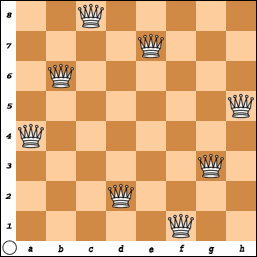



## 3 Metodologia aplicada
###3.1 Representação dos Indivíduos (Soluções Canditas em G)

A representação dos indivíduos no espaço dos fenótipos é a configuração do tabuleiro N x N, com as rainhas dispostas.

Dentre as possíveis formas de representar as soluções no espaço dos genótipos, escolhemos representar através de um vetor que contem a permutação de N inteiros. Cada posição do vetor indica uma linha do tabuleiro, enquanto os valores presentes em cada posição representam a coluna em que se encontra a rainha.
Por exemplo: o vetor x = {1, 2, 3, 4, 5, 6, 7, 8} representa um tabuleiro onde todas as rainhas estão dispostas na diagonal principal. [2]

Esta representação garante a satisfação de duas das três restrições do problema, desta forma, será necessário verificar apenas os conflitos que podem ocorrer nas diagonais. Isso reduz a complexidade das operações que serão realizadas nos indivíduos.

A primeira população foi gerada por indivíduos aleatórios.

In [2]:
## Utilizar este bloco para realizar a configuração do Fenótipo:
## Configuração do tabuleiro N × N; Definindo o problema das 8-Rainhas

# N = 8  # Tamanho do tabuleiro (8x8)
# gi = [6, 3, 7, 4, 1, 8, 2, 5]  # Vetor de configuração das rainhas

## Função Objetivo
## Desenvolvida para calcular o fitness de um indivíduo
## que é o número de conflitos que pode haver entre as rainhas.
def fitness(individual):
    conflicts = 0
    try:
        for i in range(len(individual)):
            for j in range(i + 1, len(individual)):
                if individual[i] == individual[j] or abs(i - j) == abs(
                    individual[i] - individual[j]
                ):
                    conflicts += 1
    except IndexError as e:
        print("Exception found while evaluation individual", individual)
        print(e)
        raise
    return conflicts

## Configuração do Genótipo, ou cromossomo: Permutação dos inteiros {1, 2, 3, . . . , N}.
## Função para inicializar uma população aleatória de indivíduos respeitando o gi
## passado no enunciado do problema. Dessa forma usamos o list comprehension para
## criar a população de forma mais concisa e direta, utilizando a função sample()
## do módulo random para selecionar aleatoriamente elementos de gi sem reposição,
## garantindo que cada rainha seja colocada em uma linha diferente.
def init_population(pop_size: int, board_size: int = 8):
    if board_size == 8:
        initial_gene = [6, 3, 7, 4, 1, 8, 2, 5]
    else:
        initial_gene = [i for i in range(1, board_size + 1)]
        random.shuffle(initial_gene)
    return [random.sample(initial_gene, board_size) for _ in range(pop_size)]


###3.2 Mecanismo de Seleção

O método de seleção dos pais escolhido foi o torneio, onde um número k de indivíduos da população são selecionados aleatóriamente, e o indivíduo com melhor aptidão, ou seja, com o menor numero de conflitos entre rainhas, é escolhido como um dos pais dos indivíduos. O segundo pai é selecionado da mesma forma. A implementação realizada utiliza k = 3.

In [3]:
## Mecanismo de seleção utilizado para selecionar os pais com base no torneio.
def tournament_selection(population, k=3):
    return min(random.sample(population, k), key=fitness)



###3.3 Operadores de Variação
Os operadores de variação implementados no algoritmo são o cruzamento e a mutação.
O operador de cruzamento escolhido foi o de um ponto, onde a primeira metade dos genes do filho vêm do pai um , e a outra metade é composta pelos genes do pai dois que não vieram do pai 1. Desta forma garantimos que o filho sempre será uma permutação válida de N valores. Este operador gera apenas um filho por cruzamento.

In [4]:
# Função para realizar o crossover entre dois pais (Mantendo a Permutação)
def crossover(parent1, parent2, board_size: int = 8):
    point = random.randint(1, board_size - 1)
    parent1FirstSeg = parent1[:point]
    # parent1SecSeg = parent1[point:]

    # parent2FirstSeg = parent2[:point]
    # parent2SecSeg = parent2[point:]

    child = parent1FirstSeg[:point]
    for value in parent2:
      if value not in child:
        child.append(value)
    return child




O operador de mutação escolhe dois genes do indivíduo e troca eles de posição, mantendo sempre os indivíduos como permutações válidas de N valores.

###3.4 Critério de Parada

O critério de parada nesse algoritmo é o número máximo de gerações avaliadas, configurado inicialmente para 1000.


In [5]:
# Função para realizar a mutação de um indivíduo (Mantendo a permutação)
def mutation(individual, mutation_rate, board_size: int = 8):
    for i in range(board_size):
        if random.random() < mutation_rate:
            p1 = random.randint(0, board_size - 1)
            p2 = random.randint(0, board_size - 1)
            temp1 = individual[p1]
            temp2 = individual[p2]
            individual[p1] = temp2
            individual[p2] = temp1
    return individual

In [6]:
# Função para evoluir a população por uma geração
# TODO(vitor): Check if crossover_rate should be used
def evolve_population(population, crossover_rate, mutation_rate):
    new_population = []
    while len(new_population) < len(population):
        parent1 = tournament_selection(population)
        parent2 = tournament_selection(population)
        child = crossover(parent1, parent2)
        child = mutation(child, mutation_rate)
        new_population.append(child)
    return new_population

In [7]:
# Função para plotar o tabuleiro
def print_chess_board(_positions):
    positions = []
    for i in _positions:
        positions.append(i - 1)
    n = len(positions)
    for i in range(n):
        for j in range(n):
            if positions[i] == j:
                print("Q", end=" ")
            else:
                print(".", end=" ")
        print()

## 4 Resultados e Discuções

Adicionar texto sobre análise do grupo em relação aos resultados

In [8]:
## Outras metricas de avaliação e geração de relatórios.
def plot_fitness_evolution(fitness: list[float]) -> None:
    gen_num = [i + 1 for i in range(len(fitness))]

    fig, ax = plt.subplots()
    ax.plot(gen_num, fitness)
    ax.set_xticks(gen_num)
    ax.set_xlabel("Generation")
    ax.set_ylabel("Fitness [Number of Conflicts]")
    ax.set_title("Average Population Fitness Accross Generations")

In [9]:
# Função para encontrar a melhor solução
def find_solution(
    population: list[list[int]],
    max_generations: int,
    crossover_rate: float,
    mutation_rate: float,
    verbose: bool = False,
) -> tuple[list[int], list[float], int]:
    avg_gen_fitness = []
    for generation in range(max_generations):
        population = evolve_population(
            population, crossover_rate, mutation_rate
        )
        pop_fitness = [fitness(element) for element in population]
        avg_gen_fitness.append(sum(pop_fitness) / len(pop_fitness))
        min_conflicts = min(pop_fitness)
        best_individual = population[pop_fitness.index(min_conflicts)]
        if min_conflicts == 0:
            if verbose:
                print(
                    "Melhor solução encontrada na geração",
                    generation + 1,
                    ":",
                    best_individual,
                )
            break
        elif verbose:
            print(
                "Geração",
                generation + 1,
                "- Melhor solução:",
                best_individual,
                "- Conflitos:",
                min_conflicts,
            )
    # return None, max_generations
    return best_individual, avg_gen_fitness, generation

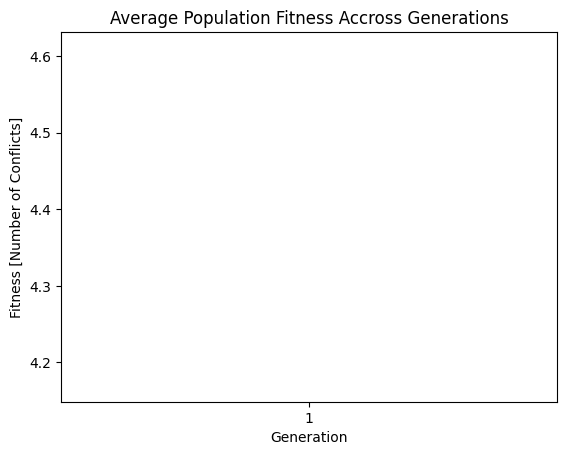

In [10]:
# Função principal F(x)
def run_ag(
    pop_size: int = 100,
    max_generations: int = 1000,
    crossover_rate: float = 0.7,
    mutation_rate: float = 0.05,
    board_size: int = 8,
    plot: bool = False,
    verbose: bool = False,
):
    population = init_population(pop_size, board_size)
    best_solution, pop_fitness_hist, generations = find_solution(
        population, max_generations, crossover_rate, mutation_rate
    )
    if verbose:
        if best_solution:
            print("Melhor solução encontrada:", best_solution)
            print("Geração:", generations)
            if plot:
                print_chess_board(best_solution)
        else:
            print(
                "Nenhuma solução encontrada após", max_generations, "gerações."
            )

    if plot:
        plot_fitness_evolution(pop_fitness_hist)

    return generations + 1

if __name__ == "__main__":
    run_ag(plot = True)

Text(0.5, 0, 'Number of Runs')

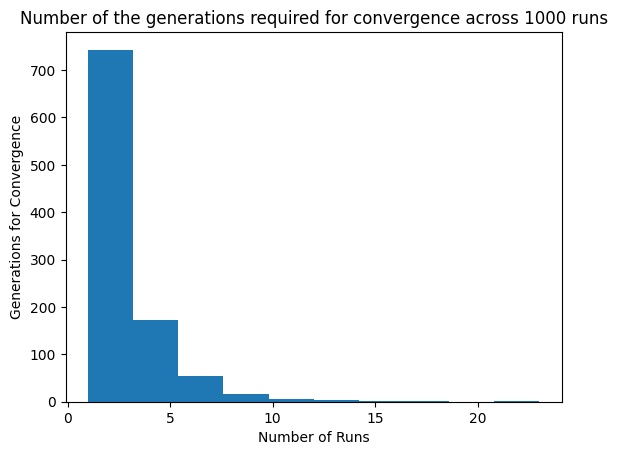

In [11]:
def run_several_generations(
    n_runs: int = 1000,
    pop_size: int = 100,
    max_generations: int = 1000,
    crossover_rate: float = 0.7,
    mutation_rate: float = 0.05,
    board_size: int = 8,
    verbose = False,
) -> None:
    runs = []
    for i in range(n_runs):
        runs.append(
            run_ag(
                pop_size,
                max_generations,
                crossover_rate,
                mutation_rate,
                board_size,
                verbose,
                verbose
            )
        )
    return runs

result = run_several_generations()

fig, ax = plt.subplots()
ax.hist(result)
ax.set_title("Number of the generations required for convergence across 1000 runs")
ax.set_ylabel("Generations for Convergence")
ax.set_xlabel("Number of Runs")

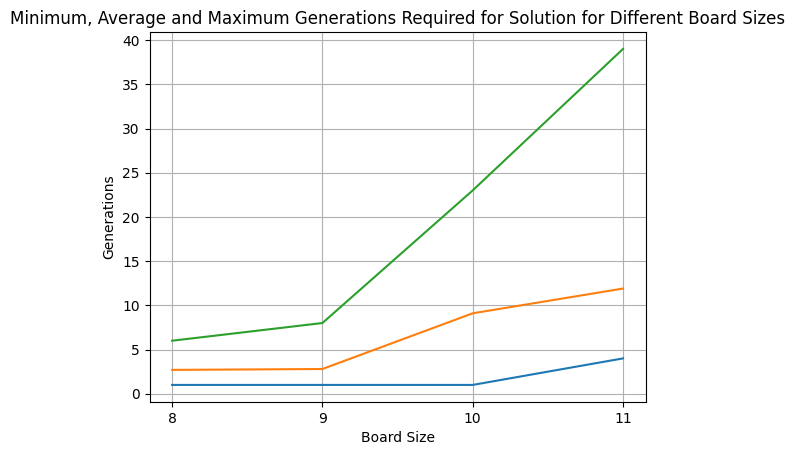

In [12]:
def run_several_board_sizes(
    min_board_size: int = 8,
    max_board_size: int = 11,
    n_runs: int = 10,
    initial_pop_size: int = 100,
    max_generations: int = 1000,
    crossover_rate: float = 0.7,
    mutation_rate: float = 0.05,
) -> list[int]:
    results = {}
    for board_size in range(min_board_size, max_board_size + 1):
        results[board_size] = run_several_generations(
            n_runs,
            int(board_size**2 * initial_pop_size / min_board_size**2),
            max_generations,
            crossover_rate,
            mutation_rate,
            board_size,
        )

    return results

board_sizes = []
min_gens = []
avg_gens = []
max_gens = []

res_board_sizes = run_several_board_sizes()

for board_size, gens_per_run in res_board_sizes.items():
    board_sizes.append(board_size)

    avg_gens.append(sum(gens_per_run) / len(gens_per_run))
    min_gens.append(min(gens_per_run))
    max_gens.append(max(gens_per_run))

boards_fig, boards_ax = plt.subplots()

boards_ax.plot(board_sizes, min_gens, label="Min")
boards_ax.plot(board_sizes, avg_gens, label="Average")
boards_ax.plot(board_sizes, max_gens, label="Max")

boards_ax.set_title("Minimum, Average and Maximum Generations Required for Solution for Different Board Sizes")
boards_ax.set_xticks(board_sizes)
boards_ax.set_xlabel("Board Size")
boards_ax.set_ylabel("Generations")
boards_ax.grid(True)

## 5 Conclusão

O modelo que minimiza o MSE do conjunto de teste é 6, significa que o modelo com seis características específicas resulta em um desempenho preditivo mais eficaz em relação ao conjunto de teste. Isso é uma indicação de que incluir essas seis características específicas é mais benéfico para a generalização do modelo em dados não vistos.

O MSE mínimo do conjunto de teste é 0.9599, indicando que, em média, os quadrados dos erros de previsão são relativamente baixos, o que é positivo. Esses resultados sugerem que o modelo com seis características está equilibrando efetivamente o viés e a variância, resultando em um desempenho geral melhor.

## 6 Referências Bibliográficas

[1] A. E. Eiben and J. E. Smith, Introduction to evolutionary computing. Springer,
2015.